## Elementare Kombinatorik

In [1]:
import itertools as it
import math

#### Mit Zurücklegen und mit Berücksichtigung der Reihenfolge  

Aus n Kugeln ziehen wir k Kugeln mit Zurücklegen und mit Berücksichtigung der Reihenfolge

In [3]:
# Alle Möglichkeiten
n = 4
k = 2
a = range(1,n+1)

iter = it.product(a, repeat=k)
for x in iter:
    print(x)

(1, 1)
(1, 2)
(1, 3)
(1, 4)
(2, 1)
(2, 2)
(2, 3)
(2, 4)
(3, 1)
(3, 2)
(3, 3)
(3, 4)
(4, 1)
(4, 2)
(4, 3)
(4, 4)


In [4]:
# Anzahl ausgeben
iter = it.product(a,repeat = k)
print(len(list(iter)))

# Anzahl berechnen
print(n**k)

16
16


#### Ohne Zurücklegen und mit Berücksichtigung der Reihenfolge

Alle Möglichkeiten durchgehen:

In [17]:
n = 4
k = 2
a = range(1,n+1)

iter = it.permutations(a, k)
for x in iter:
    print(x)

(1, 2)
(1, 3)
(1, 4)
(2, 1)
(2, 3)
(2, 4)
(3, 1)
(3, 2)
(3, 4)
(4, 1)
(4, 2)
(4, 3)


In [15]:
# Anzahl ausgeben
iter = it.permutations(a, k)
print(len(list(iter)))

# Anzahl berechnen
math.factorial(n)/math.factorial(n-k)

24


24.0

#### Ohne Zurücklegen ohne Berücksichtigung der Reihenfolge  

In [21]:
n = 5
k = 3
a = range(1,n+1)

iter = it.combinations(a, k)
for x in iter:
    print(x)

(1, 2, 3)
(1, 2, 4)
(1, 2, 5)
(1, 3, 4)
(1, 3, 5)
(1, 4, 5)
(2, 3, 4)
(2, 3, 5)
(2, 4, 5)
(3, 4, 5)


In [22]:
# Anzahl ausgeben
iter = it.combinations(a, k)
print(len(list(iter)))

# Anzahl berechnen
math.comb(n,k)

10


10

#### Lotto 6 aus 49

In [45]:
# Alle Möglichkeiten
n = 49
k = 6
a = range(1,n+1)

iter = it.combinations(a, k)
moeglich = len(list(iter))
print(moeglich) 

13983816


In [36]:
# Die Wahrscheinlichkeit bei 6 aus 49 genau vier Richtige zu tippen:
n = 49
k = 6
a = range(1,n+1)

iter = it.combinations(a, k)
guenstig = 0
for x in iter:
    if len({1,2,3,4,5,6} & set(x)) == 4:
        guenstig += 1
        
print(f'Wahrscheinlichkeit = {guenstig/moeglich*100:.3f}%')

Wahrscheinlichkeit = 0.097%


## Binomialverteilung

Ein Glücksrad ist 1/4 blau und 3/4 rot. Was ist wahrscheinlicher?

- Beim dreimaligen Drehen erscheint genau einmal das rote Feld
- Beim viermaligen Drehen erscheint genau einmal das rote Feld


In [70]:
import random 
rad = ['rot', 'blau']
weights = [0.25, 0.75]

zaehl3 = 0
zaehl4 = 0
N = 2000000
for _ in range(N):
    zug3 = ['rot' == random.choices(rad,weights)[0] for _ in range(3)]
    zug4 = ['rot' == random.choices(rad,weights)[0] for _ in range(4)]
    if sum(zug3) == 1:
        zaehl3 += 1
    if sum(zug4) == 1:
        zaehl4 += 1

print(f'{zaehl3/N*100:.2f}%, {zaehl4/N*100:.2f}%')
     

42.20%, 42.25%


In [68]:
n = 4
k = 1
p = 0.25
math.comb(n,k)*p**k*(1-p)**(n-k)

0.421875

In [71]:
n = 3
k = 1
p = 0.25
math.comb(n,k) * (p**k) * ((1-p)**(n-k))

0.421875

In [74]:
n = 4
k = 1
p = 0.25
from scipy.stats import binom
binom_dist = binom(n, p)
binom_dist.pmf(k)

0.4218750000000001

In [75]:
n = 3
k = 1
p = 0.25
from scipy.stats import binom
binom_dist = binom(n, p)
binom_dist.pmf(k)                         # probability mass function

0.4218750000000001

-----

In [76]:
# Ein idealer Würfel wird 20mal geworfen. Wie hoch ist die Wahrscheinlichkeit, genau 7 mal eine 6 zu werfen.
n = 20
k = 7
p = 1/6
binom_dist = binom(n, p)
binom_dist.pmf(k)   

0.025882058395798088

C:\Users\khthe\AppData\Local\Programs\Python\envs\py311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


AttributeError: Rectangle.set() got an unexpected keyword argument 'hist'

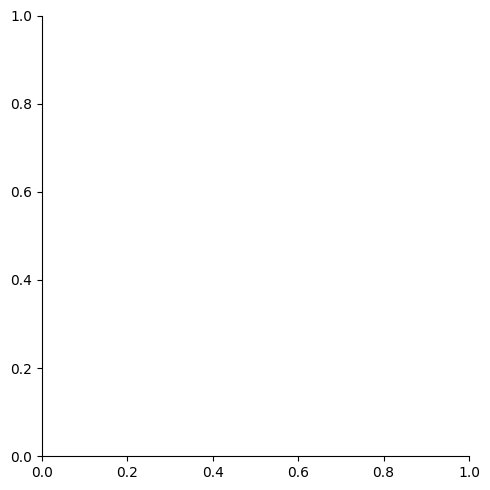

In [83]:
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

sns.displot(random.binomial(n=10, p=0.5, size=1000), hist=True, kde=False)

plt.show()